<a href="https://github.com/meryamcj"><img src = "https://www.pngjoy.com/pngm/268/5146213_colombia-mapa-colombia-y-bandera-hd-png-download.png" width = 100> </a>
<h1 align=center><font size = 5>Colombia's presidential speech visual analysis with python  </font></h1>

## Introduction
In this project I will be using some web scraping tools for python to have a simple sight of the most common words used on two different speechs from the President of Colombia found on the government official page for transcriptions and press webpages.

After retrieving our data using <b>BeautifulSoup</b>, we will use the package <b>word_cloud</b> to convert our obteined text into a wordcloud image in order to focus on the words used on it.<br>  Also, I will be representing the top 10 most commont words on each one using <b>Matplotlib</b>.  The idea is to compare the difference between them within three years apart. 

Finally, I will analyse the results in a very superficial way as the main goal for this project is to demostrate the utility from the used libraries for python.

Feel free to comment or <a href="https://www.linkedin.com/in/alixmeryam/">contact me</a> for further improvement.

Please do notice that if you want to render this Jupyter notebook you can use this link https://nbviewer.jupyter.org/


### DATA
The data used for this project was scraped from the official government speechs transcription site https://idm.presidencia.gov.co/prensa/ and then cleaned due to its sintaxis.<br>
The transcription published in www.elpais.com.co in 2018 for the president possession was also included in the analysis.
The transcription of the speechs from the dates "4th of May 2021" and "7th of august 2018" were used.<br>

## METHODOLOGY


## Scraping data from www.elpais.com.co using BeautifulSoup

In [1]:
#Import requests for web scraping
import pandas as pd
import requests as rq
import numpy as np
import collections

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import matplotlib as mpl
import matplotlib.pyplot as plt

# import k-means from clustering stage
from PIL import Image 
from matplotlib import rcParams

print('Libraries installed')

Libraries installed


In [2]:
website_url= rq.get('https://www.elpais.com.co/colombia/este-fue-el-discurso-de-posesion-del-presidente-ivan-duque-lealo-aqui.html/').text #Bring the data from the target URL

### Now we shall use BeautifulSoup library

In [3]:
#Import BeautifulSoup for html structure information from our request
from bs4 import BeautifulSoup
soup = BeautifulSoup(website_url,'lxml')

data = [element.text for element in soup.find_all("p")] #Retrieving text from "p" founds
data = str(data) #Convert to string
data


'[\'Iván Duque, presidente de Colombia.\', \'Colprensa\', \'Iván Duque, presidente de Colombia, ofreció en la tarde de este lunes su discurso de posesión en la Plaza de Bolívar.\\xa0\', \'Lea también:\\xa0"Actuaré con humildad, no seré un presidente encerrado en un Palacio": Duque\', \'Durante el discurso, el Presidente de Colombia mencionó diferentes temas como la muerte de los líderes sociales en el país, la paz y el respaldo internacional.\\xa0Léalo completo aquí:\', \'"Hoy desde esta majestuosa plaza que lleva el nombre de nuestro Libertador Simón Bolívar, quiero agradecerle a Dios y al pueblo colombiano por brindarme el honor de conducir los destinos de la Patria. Hoy llega a la Presidencia de Colombia una nueva generación, motivada por el servicio y no por el ejercicio vanidoso del poder, comprometida con el futuro y sin anclas en prejuicios del pasado, inspirada en la justicia social y en la seguridad como el cimiento de nuestras libertades, y dedicada a promover el entendimient

# What are the Word Clouds ?

A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.
For this task, we will be using the python library called 'word_cloud' developed by <b>Andreas Mueller</b>. <a hreef="https://github.com/amueller/word_cloud/">Here</a> you can find the repository and learn more about it.

In [4]:
!pip -q install wordcloud #Library for wordcloud

In [5]:
!pip -q install stop-words

In [6]:
from stop_words import get_stop_words #The words we want to ignore

stop_words_es = get_stop_words('es') #Spanish StopWords

In [7]:
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [8]:
stop_words = ["año", "mil", "millones", "pesos", "ciento", "El", "En","No","La"] + stop_words_es #Adding aditional StopWords
#initiate world cloud object
president_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stop_words
)

# generate the word cloud
president_wc.generate(data)

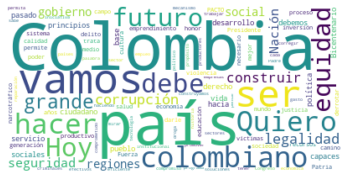

In [9]:
# display the word cloud
plt.imshow(president_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

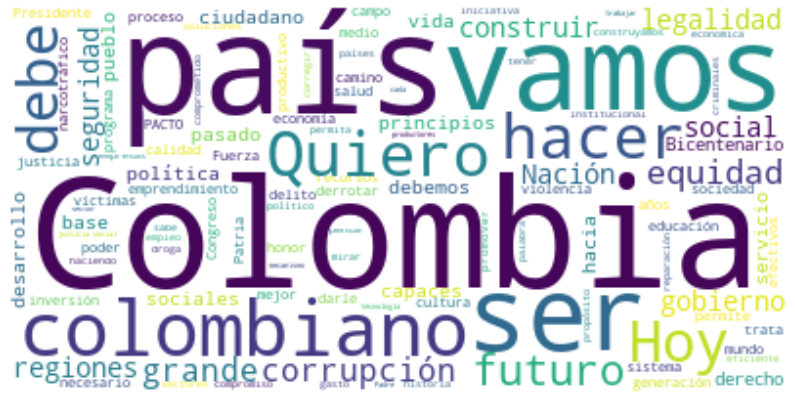

In [10]:

# re-generate the word cloud
president_wc.generate(data)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(president_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### Retrieving the image for the mask

In [11]:
!wget --quiet https://raw.githubusercontent.com/meryamcj/ColombiaPresidentWordCloud/blob/main/test.png #OutMaskImage
# save mask to mx_mask
mx_mask = np.array(Image.open('test.png'))
    
print('Image downloaded and saved!')

Image downloaded and saved!


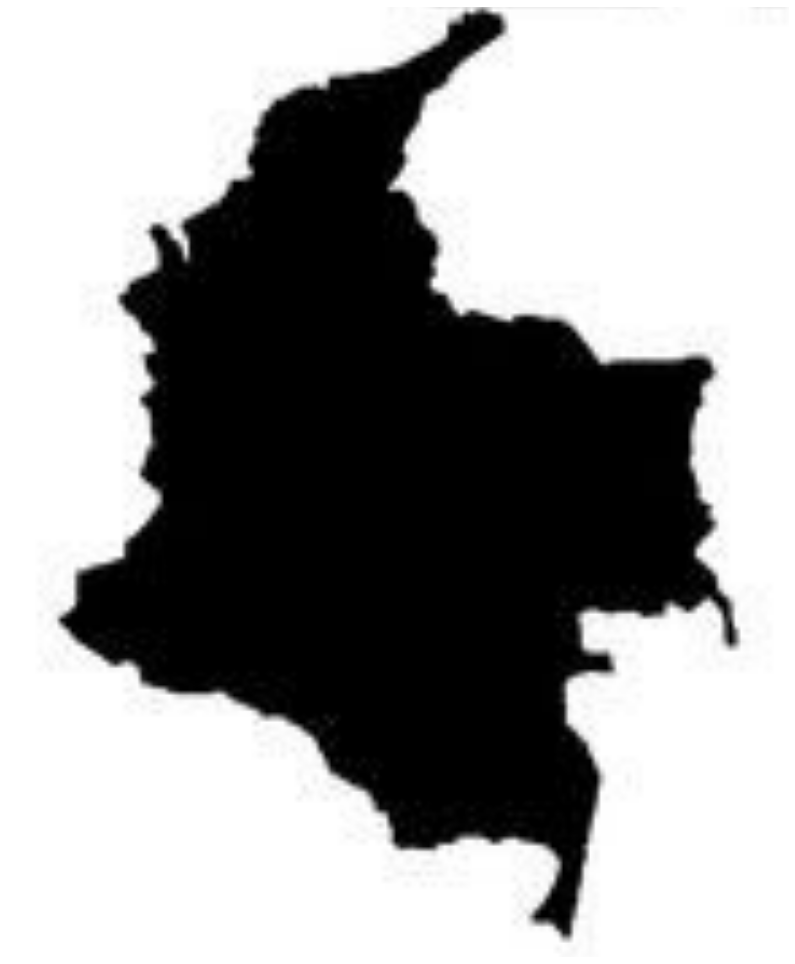

In [12]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(mx_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

***

Shaping the `word` cloud according to the mask is straightforward using `word_cloud` package. For simplicity, we will continue using the first 2000 words from the text.

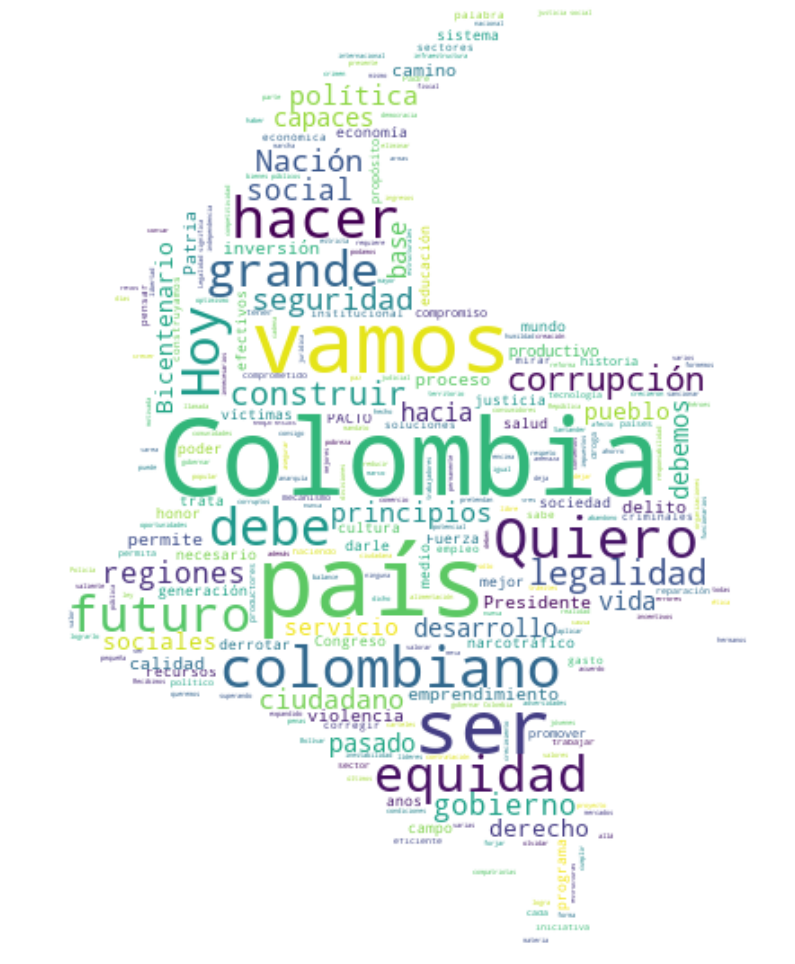

In [13]:
# instantiate a word cloud object
president_wc = WordCloud(background_color='white', max_words=2000, mask=mx_mask, stopwords=stop_words)

# generate the word cloud
president_wc.generate(data)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height


plt.imshow(president_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Prepare the data for ploting and count the words

In [14]:
filtered_words = [word for word in data.split() if word not in stop_words]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

<BarContainer object of 10 artists>

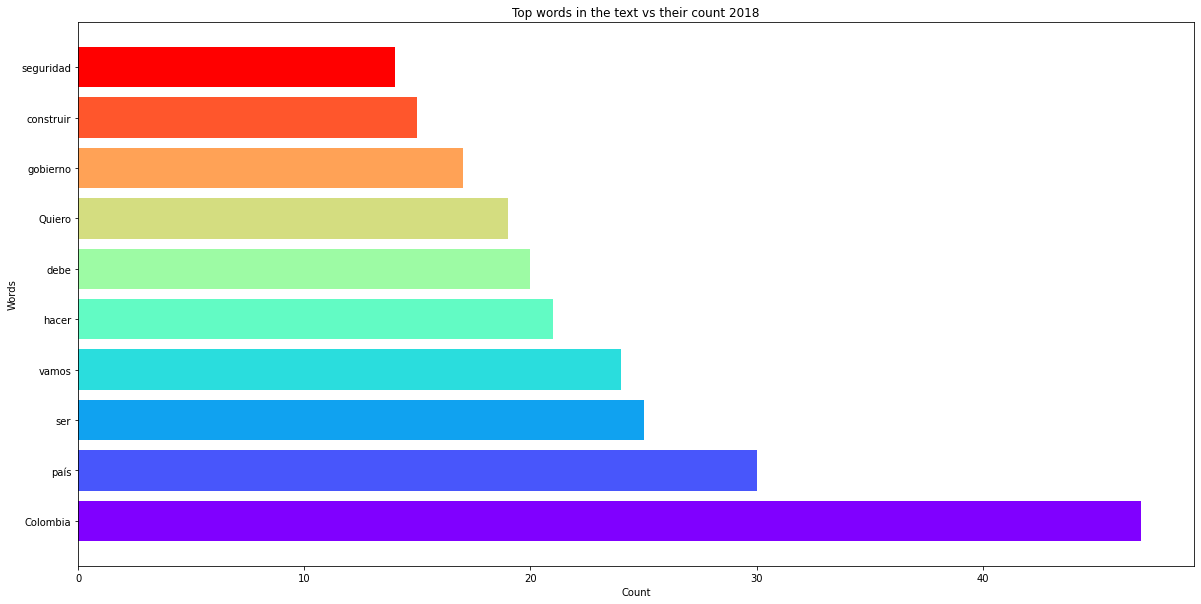

In [15]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the text vs their count 2018')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

***

# Second Post

In [16]:
website_url2= rq.get('https://idm.presidencia.gov.co/prensa/presidente-duque-anuncio-instalacion-espacio-escuchar-ciudadania-soluciones-210504').text #Bring the data from the target URL

In [17]:
soup2 = BeautifulSoup(website_url2,'lxml')

data2 = [element.text for element in soup2.find_all("p")] #Retrieving text from "p" founds
data2 = str(data2) #Convert to string

In [18]:
stop_words2 = ["año", "mil", "millones", "pesos", "ciento", "El","'El", "En","todas","violencia,","',","y,","PRESIDENTE", "IVÁN", "DUQUE" ,"MÁRQUEZ", "Iván", "INTERLOCUTOR", "Duque:", "'PRESIDENTE", "VAMOS", "Y","'Y", "'PREGUNTA:", "ser", "van", "va", "Es","'INTERLOCUTOR:", "'INTERLOCUTORA:","pues", "dos","'Entonces,", "cómo", "ahí", "ENTONCES", "PREGUNTA", "INTERLOCUTORA", "años","visto"] + stop_words_es #Adding aditional StopWords
president_wc2 = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stop_words2
)

# generate the word cloud
president_wc2.generate(data2)

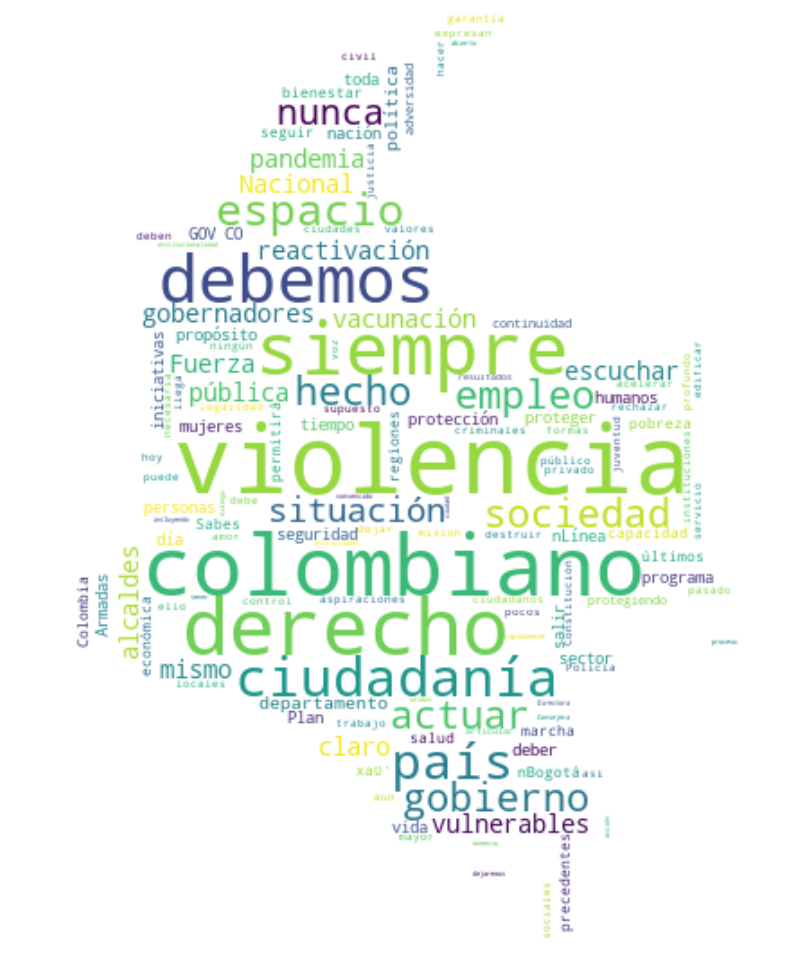

In [19]:
# instantiate a word cloud object
president_wc2 = WordCloud(background_color='white', max_words=2000, mask=mx_mask, stopwords=stop_words2)

# generate the word cloud
president_wc2.generate(data2)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height


plt.imshow(president_wc2, interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
filtered_words2 = [word for word in data2.split() if word not in stop_words2]
counted_words2 = collections.Counter(filtered_words2)

words = []
counts = []
for letter, count in counted_words2.most_common(10):
    words.append(letter)
    counts.append(count)

<BarContainer object of 10 artists>

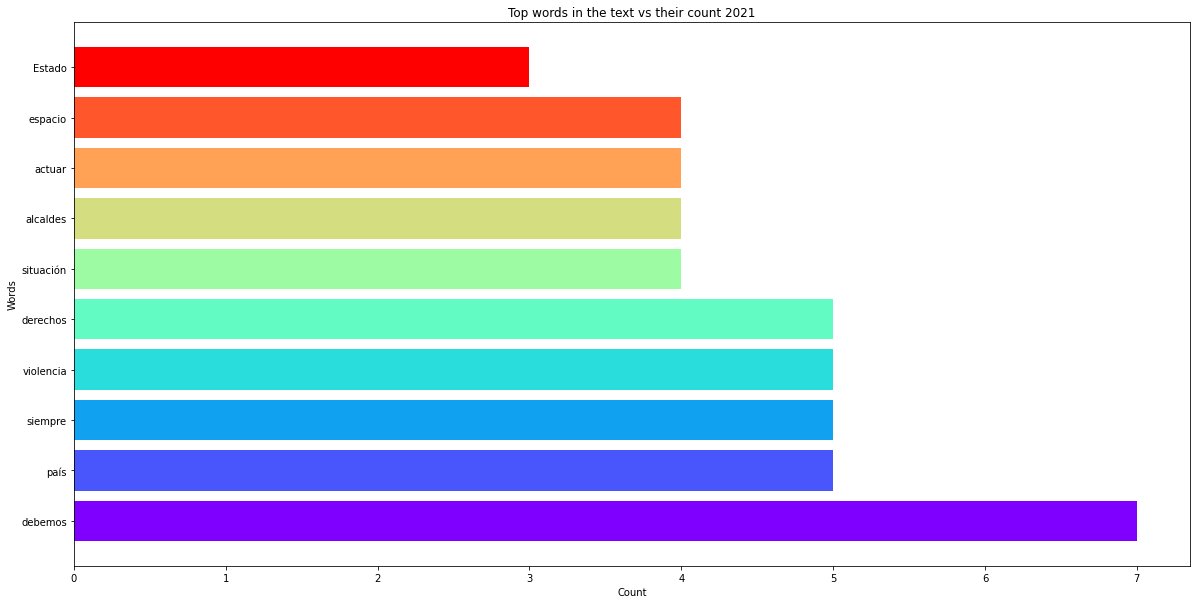

In [21]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the text vs their count 2021')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)


***

## Results 

<b>4th may 2021, top 10 words:</b>
<li> debemos</li>
<li> país</li>
<li> violencia</li>
<li> siempre</li>
<li> derechos</li>
<li> situación</li>
<li> alcaldes</li>
<li> actuar</li>
<li> espacio</li>
<li> estado</li>

<b>7th august 2018, top 10 words:</b>
<li> Colombia</li>
<li> país</li>
<li> ser</li>
<li> vamos</li>
<li> hacer</li>
<li> debe</li>
<li> quiero</li>
<li> gobierno</li>
<li> construir</li>
<li> seguridad</li>

## Conclusion

We can observe that in the 2018's speech there are words used by the government to talk about construction and security. It also mentions Colombia and the word "vamos" as an inclusion for everyone to what is expected to be built.

In the image from 2021's speech we can notice different words. Here the word 'violence' stand out but the motivation for everyone to be involved in the matter keeps going with the word "vamos". It <b>seems</b> that the words used during 2018 contained a more positive meaning compared to 2021.

In conclusion, we can use these tools to get an idea of what the President's speech represents and how it changed from year to year in a way that it is  easy to visually identify the important points the government wants to highlight.

Although we did not analyze deeply the content of the transcripts in this work, we can identify the points that the President wants to emphasize with the words used during his speech and the message he wishes to deliver.

## References

◉ https://github.com/amueller/word_cloud/ <br>
◉ https://idm.presidencia.gov.co/prensa/presidente-duque-anuncio-instalacion-espacio-escuchar-ciudadania-soluciones-210504 <br>
◉ https://www.elpais.com.co/colombia/este-fue-el-discurso-de-posesion-del-presidente-ivan-duque-lealo-aqui.html<br>
◉ https://prowritingaid.com/art/425/What-the-Heck-is-a-Word-Cloud-and-Why-Would-I-Use-One.aspx <br>
◉ https://matplotlib.org/ <br>

This notebook was made by <a href="https://www.linkedin.com/in/alixmeryam/">Alix Meryam</a>